**Background**

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

In [2]:
#load the dataframe and set column name
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(27899, 5)

In [4]:
df.columns

Index(['asins', 'categories', 'reviews.rating', 'product_name',
       'reviews.username'],
      dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [5]:
#print top 5 records of the dataset
df.head()

,asins,categories,reviews.rating,product_name,reviews.username
0,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,Adapter
1,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,truman
2,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,DaveZ
3,B01AHB9CN2,Devices,4.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,Shacks
4,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,explore42


In [6]:
#print the concise information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27899 entries, 0 to 27898
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   asins             27897 non-null  object 
 1   categories        27899 non-null  object 
 2   reviews.rating    27867 non-null  float64
 3   product_name      27899 non-null  object 
 4   reviews.username  27893 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

asins                2
categories           0
reviews.rating      32
product_name         0
reviews.username     6
dtype: int64

In [8]:
df = df.dropna()

# Check for missing values again
print(df.isna().sum())

asins               0
categories          0
reviews.rating      0
product_name        0
reviews.username    0
dtype: int64


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

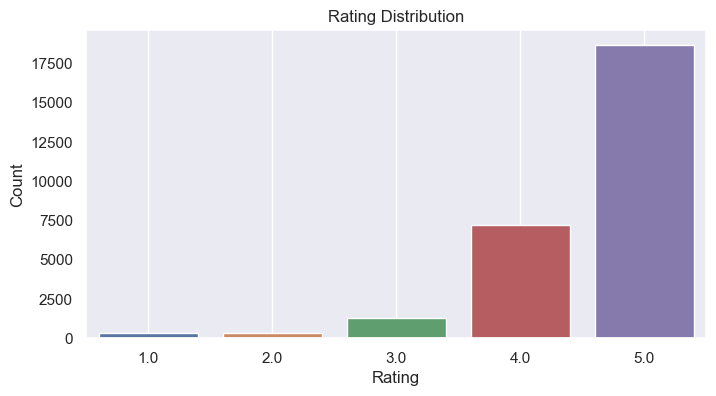

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='reviews.rating',data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [10]:
print('Total rating : ',df.shape[0])
print('Total unique users : ',df['reviews.username'].unique().shape[0])
print('Total unique products : ',df['product_name'].unique().shape[0])

Total rating :  27859
Total unique users :  21842
Total unique products :  47


analyzing the rating by user

In [11]:
no_of_rated_products_per_user = df.groupby(by='reviews.username')['reviews.rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

reviews.username
Mike               109
Chris               72
John                69
Dave                59
Amazon Customer     53
Name: reviews.rating, dtype: int64

In [12]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 6 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [13]:
data=df.groupby('product_name').filter(lambda x:x['reviews.rating'].count()>=50)

In [14]:
data.head()

,asins,categories,reviews.rating,product_name,reviews.username
0,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,Adapter
1,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,truman
2,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,DaveZ
3,B01AHB9CN2,Devices,4.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,Shacks
4,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,explore42


In [15]:
no_of_rating_per_product=data.groupby('product_name')['reviews.rating'].count().sort_values(ascending=False)

In [16]:
no_of_rating_per_product.head()

product_name
Fire Tablet 7 Display WiFi 8 GB  Includes Special Offers Magenta                                   10961
Echo White Echo White                                                                               3308
Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black     3175
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta                    2812
Amazon Fire Tv Amazon Fire Tv                                                                       2527
Name: reviews.rating, dtype: int64

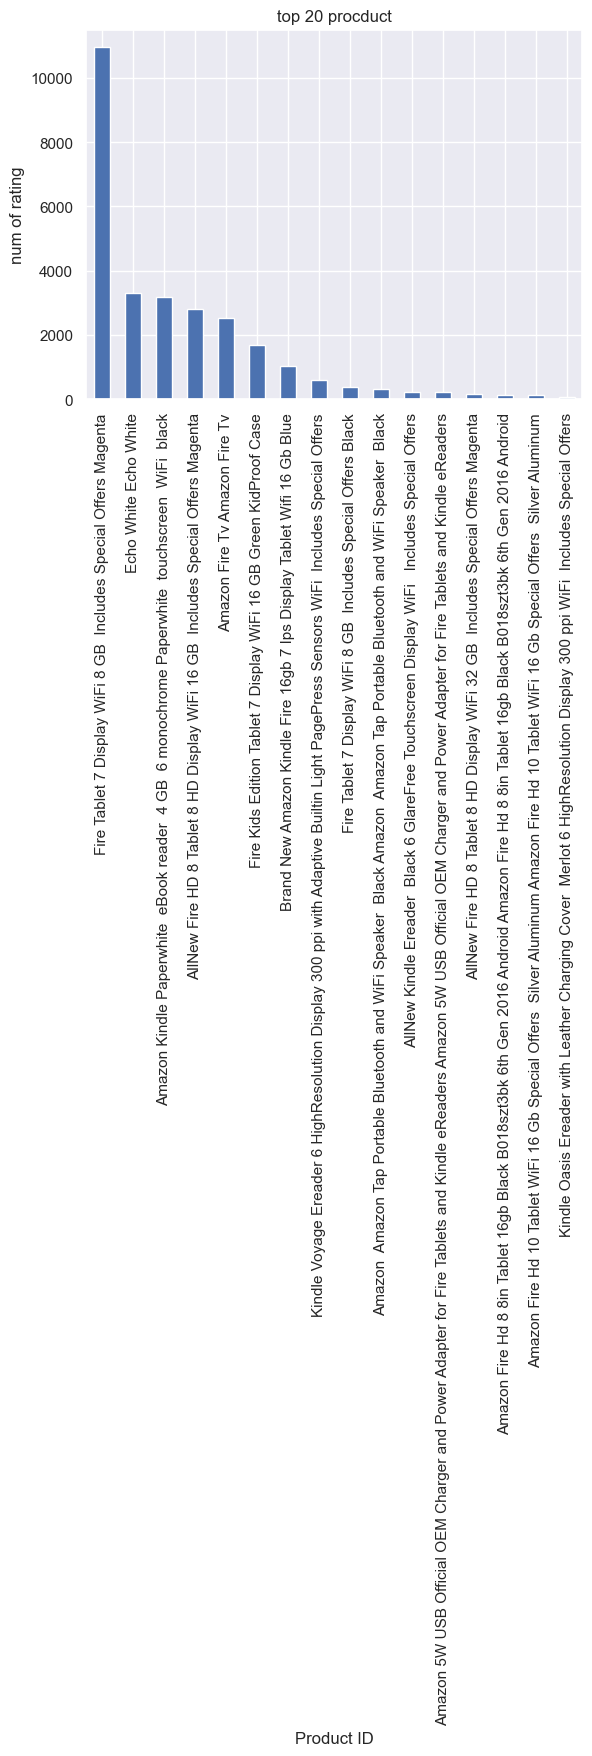

In [17]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [18]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('product_name')['reviews.rating'].mean())

In [19]:
mean_rating_product_count.head()

,reviews.rating
product_name,
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB Includes Special Offers Magenta,4.587482
AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB Includes Special Offers Magenta,4.568493
AllNew Kindle Ereader Black 6 GlareFree Touchscreen Display WiFi Includes Special Offers,4.429245
Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black,4.729560
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,4.461538


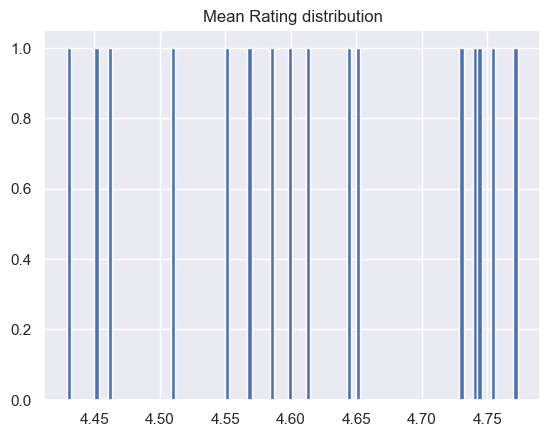

In [20]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['reviews.rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [21]:
#check the skewness of the mean rating data
mean_rating_product_count['reviews.rating'].skew()

-0.12122219488474391

In [22]:
#it is highly negative skewed

In [23]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('product_name')['reviews.rating'].count())

In [24]:
mean_rating_product_count.head()

,reviews.rating,rating_counts
product_name,,
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB Includes Special Offers Magenta,4.587482,2812
AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB Includes Special Offers Magenta,4.568493,146
AllNew Kindle Ereader Black 6 GlareFree Touchscreen Display WiFi Includes Special Offers,4.429245,212
Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black,4.729560,318
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,4.461538,208


In [25]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,reviews.rating,rating_counts
product_name,,
Fire Tablet 7 Display WiFi 8 GB Includes Special Offers Magenta,4.453243,10961


In [26]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  67
total min average rating products :  1


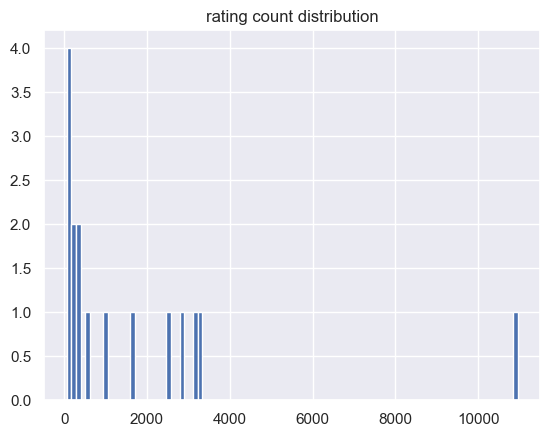

In [27]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

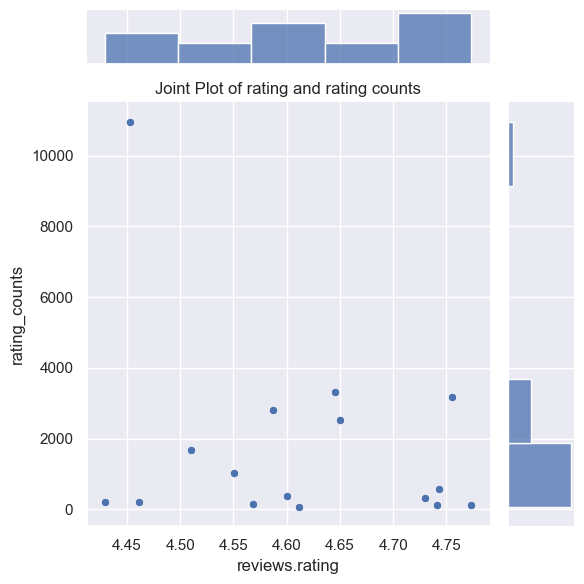

In [28]:
#joint plot of rating and rating counts
sns.jointplot(x='reviews.rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

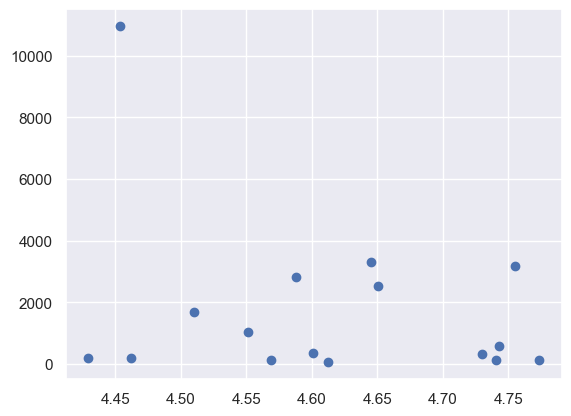

In [29]:
plt.scatter(x=mean_rating_product_count['reviews.rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [30]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['reviews.rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : -0.28765804433497166 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [31]:
#import surprise library for collebrative filtering
#check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [32]:
from surprise import Reader, Dataset

# Assuming 'data' is your pandas DataFrame
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(df[['reviews.username', 'product_name', 'reviews.rating']], reader)


In [33]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [34]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [35]:
#make prediction using testset
test_pred=algo.test(testset)

In [36]:
# Print RMSE and MAE
rmse = accuracy.rmse(test_pred, verbose=False)
mae = accuracy.mae(test_pred, verbose=False)

print('Test set for RMSE:', rmse)
print('Test set for MAE:', mae)


Test set for RMSE: 0.7906970403054927
Test set for MAE: 0.5848418708192873


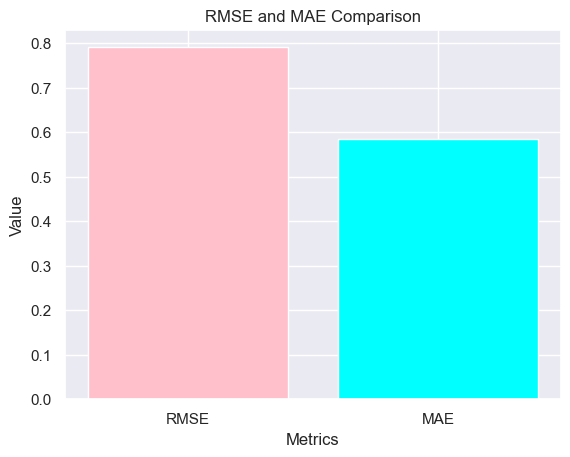

In [37]:
# Plot the comparison
metrics = ['RMSE', 'MAE']
values = [rmse, mae]

plt.bar(metrics, values, color=['pink', 'cyan'])
plt.title('RMSE and MAE Comparison')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [51]:
ratings_matrix = df.pivot_table(values='reviews.rating', index='categories', columns='product_name', fill_value=0)
print(f"Shape of the ratings matrix: {ratings_matrix.shape}")



Shape of the ratings matrix: (4, 47)


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [52]:
#check the shape of the rating_matrix
ratings_matrix.shape

(4, 47)

In [53]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

categories,Devices,Devices Accessories,Electronics,Smart Home
product_name,,,,
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB Includes Special Offers Magenta,4.587482,0.000000,0.0,0.00000
AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB Includes Special Offers Magenta,4.568493,0.000000,0.0,0.00000
AllNew Kindle Ereader Black 6 GlareFree Touchscreen Display WiFi Includes Special Offers,0.000000,4.429245,0.0,0.00000
Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black,0.000000,0.000000,0.0,4.72956
Amazon Fire 16GB 5th Gen 2015 Release Black Amazon Fire 16GB 5th Gen 2015 Release Black,0.000000,0.000000,4.6,0.00000


In [54]:
x_ratings_matrix.shape

(47, 4)

In [55]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=4)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(47, 4)

In [56]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(47, 47)

In [57]:
x_ratings_matrix.index[10]

'Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum'

In [58]:
i="Echo White Echo White"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

32


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [59]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(47,)

In [60]:
correlation_matrix[correlation_product_ID>0.75].shape

(15, 47)

In [61]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.7])
recommend[:20]

['Amazon  Fire 16GB 5th Gen 2015 Release  Black Amazon  Fire 16GB 5th Gen 2015 Release  Black',
 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'Amazon Echo and Fire TV Power Adapter Amazon Echo and Fire TV Power Adapter',
 'Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen 2016 Android Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen 2016 Android',
 'Amazon Fire Kids Edition Tablet 7 Display WiFi 16 GB Blue KidProof Case  Blue',
 'Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black',
 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
 'Certified Refurbished Amazon Fire TV Stick Previous Generation  1st Certified Refurbished Amazon Fire TV Stick Previous Generation  1st',
 'Certified Refurbished Amazon Fire TV Stick Previous Generation  1st Kindle Paperwhite',
 'Certi

In [62]:
import numpy as np

def recommend_similar_products(user_choice, correlation_matrix, x_ratings_matrix, threshold=0.5, top_n=20):
    # Get product ID for the user's choice
    product_names = list(x_ratings_matrix.index)
    product_id = product_names.index(user_choice)
    
    # Get correlation scores for the specified product
    correlation_product_ID = correlation_matrix[product_id]
    
    # Get highly correlated product IDs
    highly_correlated_product_ids = np.where(correlation_product_ID > threshold)[0]
    
    # Get top N highly correlated products
    top_similar_products = [product_names[pid] for pid in highly_correlated_product_ids if pid != product_id][:top_n]
    
    return top_similar_products

def display_product_list(product_names):
    print("Available Products:")
    for idx, product in enumerate(product_names, start=1):
        print(f"{idx}. {product}")

def display_recommendations(recommendations):
    print("Top recommended products:")
    for idx, product in enumerate(recommendations, start=1):
        print(f"{idx}. {product}")

# Example usage
product_names = list(x_ratings_matrix.index)
display_product_list(product_names)

# Let the user pick a product
user_choice_idx = int(input("Enter the number of the product you want to find similar products for: ")) - 1
user_choice = product_names[user_choice_idx]

# Recommend similar products based on user's choice
recommendations = recommend_similar_products(user_choice, correlation_matrix, x_ratings_matrix)
display_recommendations(recommendations)


Available Products:
1. AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta
2. AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB  Includes Special Offers Magenta
3. AllNew Kindle Ereader  Black 6 GlareFree Touchscreen Display WiFi   Includes Special Offers
4. Amazon  Amazon Tap Portable Bluetooth and WiFi Speaker  Black Amazon  Amazon Tap Portable Bluetooth and WiFi Speaker  Black
5. Amazon  Fire 16GB 5th Gen 2015 Release  Black Amazon  Fire 16GB 5th Gen 2015 Release  Black
6. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Amazon  Kindle Voyage  4GB  WiFi  3G  Black
7. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Fire HD 8 Tablet with Alexa 8 HD Display 16 GB Tangerine  with Special Offers
8. Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders
9. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eR

Enter the number of the product you want to find similar products for:  2


Top recommended products:
1. AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta
2. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Amazon  Kindle Voyage  4GB  WiFi  3G  Black
3. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Fire HD 8 Tablet with Alexa 8 HD Display 16 GB Tangerine  with Special Offers
4. Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black
5. Amazon Kindle Touch Leather Case 4th Generation  2011 Release Olive Green Amazon Kindle Touch Leather Case 4th Generation  2011 Release Olive Green
6. Amazon Standing Protective Case for Fire HD 6 4th Generation  Black Amazon Standing Protective Case for Fire HD 6 4th Generation  Black
7. Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue
8. Certified Refurbished Amazon Fire TV Previous Generation  1st Certified Refurbished Amazon Fire TV Previous Generation  1st
9. Fire HD 8 Tablet with Alexa 8 HD Display 16 GB Tangerine  with Special Offers
10.